#📌 Extracão

In [2]:
import pandas as pd
import plotly.express as px
from IPython.display import Image, display
!pip install kaleido==0.2.1


df = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json')


Defaulting to user installation because normal site-packages is not writeable


In [3]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [5]:
df_normalizado = pd.json_normalize(df.to_dict('records'))
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [6]:
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
df_tratado = df_normalizado.copy()

#corrigindo tipos de dados e valores ausentes
df_tratado['account.Charges.Total'] = pd.to_numeric(
    df_tratado['account.Charges.Total'], errors='coerce'
).fillna(0)

#padronizando as colunas
df_tratado.columns = df_tratado.columns.str.replace(r'^(customer|phone|internet|account)\.', '', regex=True)
df_tratado.columns = df_tratado.columns.str.replace('Charges.', '', regex=False)

#padronizando algunmas colunas categoricas com letras minusculas
colunas_para_padronizar = ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                           'PaperlessBilling']

for coluna in colunas_para_padronizar:
    # Verifica se a coluna existe antes de tentar modificar
    if coluna in df_tratado.columns:
        df_tratado[coluna] = df_tratado[coluna].str.lower()


In [8]:
df_tratado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,DSL,...,yes,no,yes,yes,no,One year,yes,Mailed check,65.6,593.30
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,DSL,...,no,no,no,no,yes,Month-to-month,no,Mailed check,59.9,542.40
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,Fiber optic,...,no,yes,no,no,no,Month-to-month,yes,Electronic check,73.9,280.85
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,Fiber optic,...,yes,yes,no,yes,yes,Month-to-month,yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,Fiber optic,...,no,no,yes,yes,no,Month-to-month,yes,Mailed check,83.9,267.40


In [9]:
dias_no_mes = 30

df_tratado['Contas_Diarias'] = (df_tratado['Monthly'] / dias_no_mes).round(2)
df_tratado[['Monthly', 'Contas_Diarias']].head()

,Monthly,Contas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


In [10]:
#Realizando a padronização e transformação de dados

df_final = df_tratado.copy()

# Colunas que contêm 'sim' ou 'não'
colunas_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService','MultipleLines', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' ,'PaperlessBilling']

# Dicionário de substituição
mapa_binario = {'yes': 1, 'no': 0}

for coluna in colunas_binarias:
    if coluna in df_final.columns:
        df_final[coluna] = df_final[coluna].map(mapa_binario)
        df_final[coluna] = df_final[coluna].fillna(0)
        df_final[coluna] = df_final[coluna].astype(int)

df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Contas_Diarias
0,0002-ORFBO,0,female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [11]:
#Traduzindo e Renomeando as colunas e Conteúdo


mapa_colunas = {
    'customerID': 'id_cliente',
    'Churn': 'evasao',
    'gender': 'genero',
    'SeniorCitizen': 'idoso',
    'Partner': 'possui_parceiro',
    'Dependents': 'possui_dependentes',
    'tenure': 'meses_contrato',
    'PhoneService': 'servico_telefone',
    'MultipleLines': 'multiplas_linhas',
    'InternetService': 'servico_internet',
    'OnlineSecurity': 'seguranca_online',
    'OnlineBackup': 'backup_online',
    'DeviceProtection': 'protecao_dispositivo',
    'TechSupport': 'suporte_tecnico',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_filmes',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'fatura_digital',
    'PaymentMethod': 'metodo_pagamento',
    'Monthly': 'faturamento_mensal',
    'Total': 'faturamento_total',
    'Contas_Diarias': 'faturamento_diario'
}


df_final.rename(columns=mapa_colunas, inplace=True)

df_final['genero'] = df_final['genero'].str.strip().map({'female': 'feminino', 'male': 'masculino'})

#📊 Carga e análise

In [12]:
#count: O número de registros não nulos. Como já tratamos os dados, todas as colunas têm a mesma contagem.
#mean (Média): O valor médio de cada coluna.
#std (Desvio Padrão): Mede a dispersão dos dados. Um valor alto (como em meses_contrato e faturamento_total) indica que os valores estão bem espalhados.
#min: O valor mínimo. Vemos clientes com apenas 1 mês de contrato e faturamento mensal mínimo de 18.25.
#25% (1º Quartil): 25% dos clientes têm valores abaixo deste. Por exemplo, 25% dos clientes ficam na empresa por 9 meses ou menos.
#50% (Mediana): O valor do meio, que divide os dados em 50%. A mediana de meses_contrato é 29, o que significa que metade dos clientes fica até 29 meses e a outra metade fica mais tempo. É uma medida mais robusta a outliers que a média.
#75% (3º Quartil): 75% dos clientes têm valores abaixo deste.
#max: O valor máximo. Temos clientes muito antigos (72 meses) e com faturas mensais altas (118.75).

resumo_numerico = df_final.describe()
resumo_numerico

,evasao,idoso,possui_parceiro,possui_dependentes,meses_contrato,servico_telefone,multiplas_linhas,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,fatura_digital,faturamento_mensal,faturamento_total,faturamento_diario
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157292
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [13]:
#count: Número total de registros.
#unique: Quantos valores diferentes existem na coluna. A coluna metodo_pagamento tem 4 métodos diferentes.
#top: O valor mais comum. O tipo de contrato mais comum é o Mensal (Month-to-month).
#freq: Quantas vezes o valor mais comum aparece. O contrato mensal aparece 3875 vezes.

resumo_categorico = df_final.describe(include=['object'])
resumo_categorico

,id_cliente,genero,servico_internet,seguranca_online,backup_online,tipo_contrato,metodo_pagamento
count,7267,7267,7267,7267,7267,7267,7267
unique,7267,2,3,3,3,3,4
top,0002-ORFBO,masculino,Fiber optic,no,no,Month-to-month,Electronic check
freq,1,3675,3198,3608,3182,4005,2445


In [14]:
#Distribuição da Evasao
contagem_evasao = df_final['evasao'].value_counts()

df_evasao_plot = contagem_evasao.reset_index()
df_evasao_plot.columns = ['evasao', 'Contagem']

# Traduzindo os valores binários de volta para um formato legível para o gráfico
df_evasao_plot['evasao'] = df_evasao_plot['evasao'].map({0: 'Permaneceu', 1: 'Saiu'})


In [15]:
#Criando o grafico
fig = px.pie(df_evasao_plot,
             names='evasao',
             values='Contagem',
             title='Distribuição da Evasão de Clientes',
             hole=0.4,
             color_discrete_map={'Permaneceu':'royalblue',
                                 'Saiu':'darkorange'})

fig.update_traces(textposition='inside', textinfo='percent+label', pull=[0, 0.05])
fig.update_layout(showlegend=False)

fig.write_image("imagens/grafico_evasao_distribuicao.png")

fig.show()

C:\Users\Matheus\AppData\Local\Temp\ipykernel_12928\2737522939.py:13: DeprecationWarning:


Support for Kaleido versions less than 1.0.0 is deprecated and will be removed after September 2025.
Please upgrade Kaleido to version 1.0.0 or greater (`pip install 'kaleido>=1.0.0'` or `pip install 'plotly[kaleido]'`).




In [16]:
#Evasao por Tipo de contrato
df_plot = df_final.copy()
df_plot['evasao'] = df_plot['evasao'].map({1: 'Cancelou', 0: 'Permaneceu'})


mapa_contrato = {
    'Month-to-month': 'Mensal',
    'One year': 'Anual',
    'Two year': 'Dois Anos'
}
df_plot['tipo_contrato'] = df_plot['tipo_contrato'].map(mapa_contrato)


df_agrupado = df_plot.groupby(['tipo_contrato', 'evasao']).size().reset_index(name='Contagem')

fig_contrato = px.bar(
    df_agrupado,
    x='tipo_contrato',
    y='Contagem',
    color='evasao',
    barmode='group',
    title='Evasão de Clientes por Tipo de Contrato',
    text_auto=True,
    color_discrete_map={
        'Permaneceu': 'royalblue',
        'Cancelou': 'darkorange'
    }
)

fig_contrato.update_layout(
    xaxis_title='Tipo de Contrato',
    yaxis_title='Contagem de Clientes'
)

fig_contrato.write_image("imagens/grafico_evasao_por_contrato.png")

fig_contrato.show()

C:\Users\Matheus\AppData\Local\Temp\ipykernel_12928\3138793422.py:35: DeprecationWarning:


Support for Kaleido versions less than 1.0.0 is deprecated and will be removed after September 2025.
Please upgrade Kaleido to version 1.0.0 or greater (`pip install 'kaleido>=1.0.0'` or `pip install 'plotly[kaleido]'`).




In [17]:
#Evasão por Método de pagamento
df_plot_pagamento = df_final.copy()
df_plot_pagamento['evasao'] = df_plot_pagamento['evasao'].map({1: 'Cancelou', 0: 'Permaneceu'})

mapa_pagamento = {
    'Electronic check': 'Cheque Eletrônico',
    'Mailed check': 'Cheque Físico (Correio)',
    'Bank transfer (automatic)': 'Transferência Bancária (Automática)',
    'Credit card (automatic)': 'Cartão de Crédito (Automático)'
}
df_plot_pagamento['metodo_pagamento'] = df_plot_pagamento['metodo_pagamento'].map(mapa_pagamento)

df_agrupado_pagamento = df_plot_pagamento.groupby(['metodo_pagamento', 'evasao']).size().reset_index(name='Contagem')

fig_pagamento = px.bar(
    df_agrupado_pagamento,
    x='metodo_pagamento',
    y='Contagem',
    color='evasao',
    barmode='group',
    title='Evasão de Clientes por Método de Pagamento',
    text_auto=True,
    color_discrete_map={'Permaneceu': 'royalblue', 'Cancelou': 'darkorange'}
)

fig_pagamento.update_layout(
    xaxis_title='Método de Pagamento',
    yaxis_title='Contagem de Clientes'
)
fig_pagamento.write_image("imagens/grafico_evasao_por_pagamento.png")
fig_pagamento.show()

C:\Users\Matheus\AppData\Local\Temp\ipykernel_12928\1645243903.py:30: DeprecationWarning:


Support for Kaleido versions less than 1.0.0 is deprecated and will be removed after September 2025.
Please upgrade Kaleido to version 1.0.0 or greater (`pip install 'kaleido>=1.0.0'` or `pip install 'plotly[kaleido]'`).




In [18]:
#Evasão por Serviço de Internet
df_plot_internet = df_final.copy()
df_plot_internet['evasao'] = df_plot_internet['evasao'].map({1: 'Cancelou', 0: 'Permaneceu'})


mapa_internet = {
    'DSL': 'DSL',
    'Fiber optic': 'Fibra Ótica',
    'No': 'Não Possui Internet'
}
df_plot_internet['servico_internet'] = df_plot_internet['servico_internet'].map(mapa_internet)


df_agrupado_internet = df_plot_internet.groupby(['servico_internet', 'evasao']).size().reset_index(name='Contagem')


fig_internet = px.bar(
    df_agrupado_internet,
    x='servico_internet',
    y='Contagem',
    color='evasao',
    barmode='group',
    title='Evasão de Clientes por Serviço de Internet',
    text_auto=True,
    color_discrete_map={'Permaneceu': 'royalblue', 'Cancelou': 'darkorange'}
)
fig_internet.update_layout(xaxis_title='Serviço de Internet', yaxis_title='Contagem de Clientes')

fig_internet.write_image("imagens/grafico_evasao_por_internet.png")
fig_internet.show()


C:\Users\Matheus\AppData\Local\Temp\ipykernel_12928\358354891.py:29: DeprecationWarning:


Support for Kaleido versions less than 1.0.0 is deprecated and will be removed after September 2025.
Please upgrade Kaleido to version 1.0.0 or greater (`pip install 'kaleido>=1.0.0'` or `pip install 'plotly[kaleido]'`).




In [19]:
#Evasão por Suporte Técnico
df_plot_suporte = df_final.copy()
df_plot_suporte['evasao'] = df_plot_suporte['evasao'].map({1: 'Cancelou', 0: 'Permaneceu'})


df_plot_suporte['suporte_tecnico'] = df_plot_suporte['suporte_tecnico'].map({1: 'Com Suporte Técnico', 0: 'Sem Suporte Técnico'})


df_agrupado_suporte = df_plot_suporte.groupby(['suporte_tecnico', 'evasao']).size().reset_index(name='Contagem')


fig_suporte = px.bar(
    df_agrupado_suporte,
    x='suporte_tecnico',
    y='Contagem',
    color='evasao',
    barmode='group',
    title='Evasão de Clientes por Contratação de Suporte Técnico',
    text_auto=True,
    color_discrete_map={'Permaneceu': 'royalblue', 'Cancelou': 'darkorange'}
)
fig_suporte.update_layout(xaxis_title='Possui Suporte Técnico?', yaxis_title='Contagem de Clientes')

fig_suporte.write_image("imagens/grafico_evasao_por_suporte.png")
fig_suporte.show()


C:\Users\Matheus\AppData\Local\Temp\ipykernel_12928\567640296.py:24: DeprecationWarning:


Support for Kaleido versions less than 1.0.0 is deprecated and will be removed after September 2025.
Please upgrade Kaleido to version 1.0.0 or greater (`pip install 'kaleido>=1.0.0'` or `pip install 'plotly[kaleido]'`).




In [20]:
#Análise 1: Evasão por Tempo de Contrato
df_plot_numerico = df_final.copy()
df_plot_numerico['evasao'] = df_plot_numerico['evasao'].map({1: 'Cancelou', 0: 'Permaneceu'})

fig_meses = px.box(
    df_plot_numerico,
    x='evasao',
    y='meses_contrato',
    color='evasao',
    title='Distribuição do Tempo de Contrato por Evasão',
    color_discrete_map={'Permaneceu': 'royalblue', 'Cancelou': 'darkorange'}
)

fig_meses.update_layout(xaxis_title='Status do Cliente', yaxis_title='Meses de Contrato')

fig_meses.write_image("imagens/grafico_evasao_por_meses.png")
fig_meses.show()

C:\Users\Matheus\AppData\Local\Temp\ipykernel_12928\2380251800.py:16: DeprecationWarning:


Support for Kaleido versions less than 1.0.0 is deprecated and will be removed after September 2025.
Please upgrade Kaleido to version 1.0.0 or greater (`pip install 'kaleido>=1.0.0'` or `pip install 'plotly[kaleido]'`).




In [21]:
#Análise 2: Evasão por Faturamento Mensal
fig_mensal = px.box(
    df_plot_numerico,
    x='evasao',
    y='faturamento_mensal',
    color='evasao',
    title='Distribuição do Faturamento Mensal por Evasão',
    color_discrete_map={'Permaneceu': 'royalblue', 'Cancelou': 'darkorange'}
)

fig_mensal.update_layout(xaxis_title='Status do Cliente', yaxis_title='Faturamento Mensal ($)')

fig_mensal.write_image("imagens/grafico_evasao_por_faturamento_mensal.png")
fig_mensal.show()

C:\Users\Matheus\AppData\Local\Temp\ipykernel_12928\3638267864.py:13: DeprecationWarning:


Support for Kaleido versions less than 1.0.0 is deprecated and will be removed after September 2025.
Please upgrade Kaleido to version 1.0.0 or greater (`pip install 'kaleido>=1.0.0'` or `pip install 'plotly[kaleido]'`).




In [22]:
#Análise 3: Evasão por Faturamento Total

fig_total = px.box(
    df_plot_numerico,
    x='evasao',
    y='faturamento_total',
    color='evasao',
    title='Distribuição do Faturamento Total por Evasão',
    color_discrete_map={'Permaneceu': 'royalblue', 'Cancelou': 'darkorange'}
)

fig_total.update_layout(xaxis_title='Status do Cliente', yaxis_title='Faturamento Total Acumulado ($)')
fig_total.show()

#📄Relatorio Final

# **📄 Relatório Final: Análise de Evasão de Clientes da Telecom X**

---

## **1. Introdução**

Este relatório apresenta uma análise detalhada sobre a evasão de clientes (churn) na empresa **Telecom X**. Diante de um alto índice de cancelamentos, o objetivo principal deste projeto foi **identificar os principais fatores e perfis de clientes associados a uma maior probabilidade de evasão**.

Para isso, realizamos um processo completo de **Extração, Transformação e Carga (ETL)** dos dados, seguido de uma **Análise Exploratória de Dados (EDA)**. Os insights gerados aqui servirão como base para a equipe de Data Science desenvolver modelos preditivos e para a empresa criar estratégias de retenção mais eficazes.

---

## **2. Limpeza e Tratamento de Dados**

O processo de preparação dos dados garantiu a qualidade e a consistência da análise, envolvendo as seguintes etapas:
* **Normalização e Extração**: O arquivo JSON aninhado foi transformado em um formato tabular padrão.
* **Correção de Tipos e Valores Ausentes**: A coluna de faturamento total foi convertida para numérica e os valores ausentes, referentes a clientes novos, foram preenchidos com `0`.
* **Criação de Variáveis**: A coluna `faturamento_diario` foi criada para enriquecer a análise.
* **Padronização e Tradução**: Colunas e dados foram traduzidos para o português, e valores binários foram convertidos para o formato numérico (`1`/`0`).

---

## **3. Análise Exploratória de Dados (EDA)**

### **3.1. Visão Geral da Evasão**

A análise inicial revela que a empresa possui uma taxa de evasão de aproximadamente **26.6%**, um número considerável que impacta diretamente a receita e o crescimento da Telecom X.

> **Insight Principal:** Mais de um quarto dos clientes cancelaram o serviço. Este é o desafio central a ser combatido.

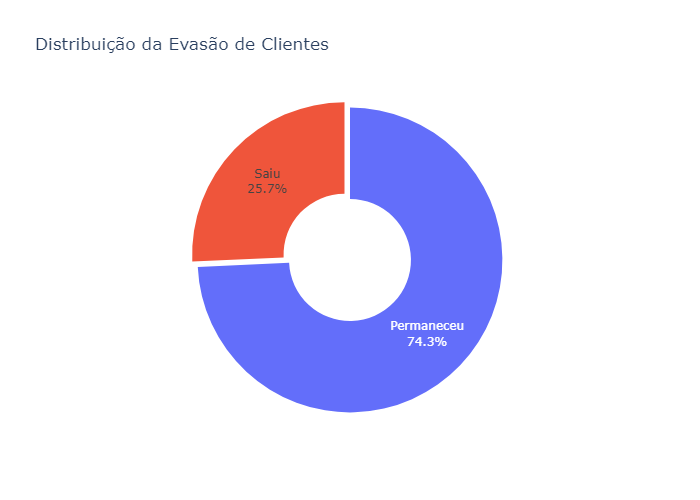

In [23]:
display(Image('imagens/grafico_evasao_distribuicao.png'))

### **3.2. Evasão por Perfil e Serviço Contratado**

Ao cruzar a evasão com as características dos clientes, surgem padrões claros.

* **Tipo de Contrato**: É o fator mais determinante. Clientes com **contrato mensal** são, de longe, os mais propensos a cancelar. Em contrapartida, contratos de **um e dois anos** garantem uma retenção muito maior.

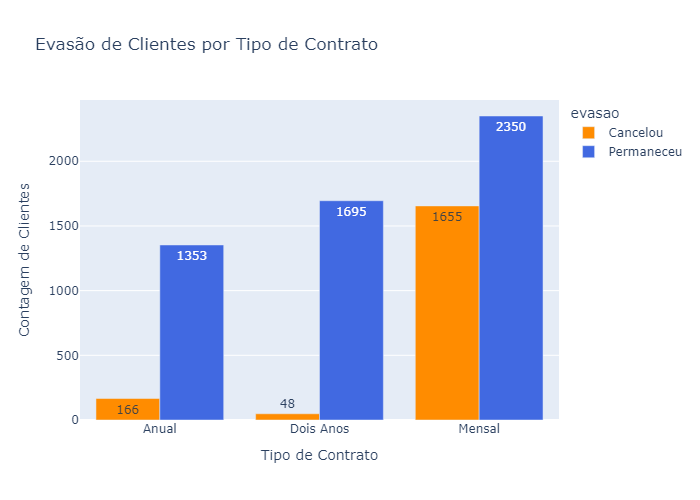

In [24]:
display(Image('imagens/grafico_evasao_por_contrato.png'))

* **Método de Pagamento**: O pagamento via **Cheque Eletrônico** está associado a uma taxa de cancelamento muito superior à dos métodos automáticos, sugerindo um ponto de atrito na experiência do cliente.

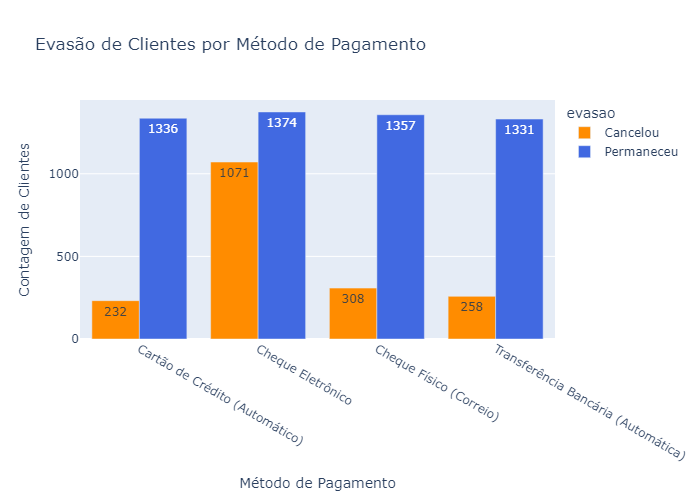

In [25]:
display(Image('imagens/grafico_evasao_por_pagamento.png'))

* **Serviço de Internet e Suporte**: Clientes com **Fibra Ótica** e aqueles **sem Suporte Técnico** também apresentam taxas de evasão significativamente mais altas.

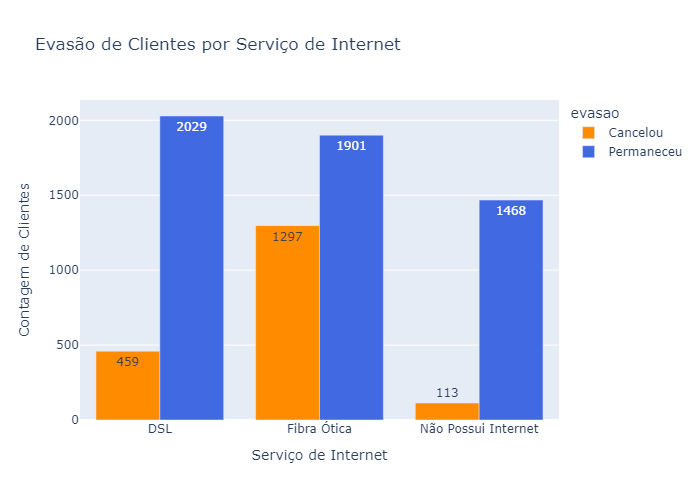

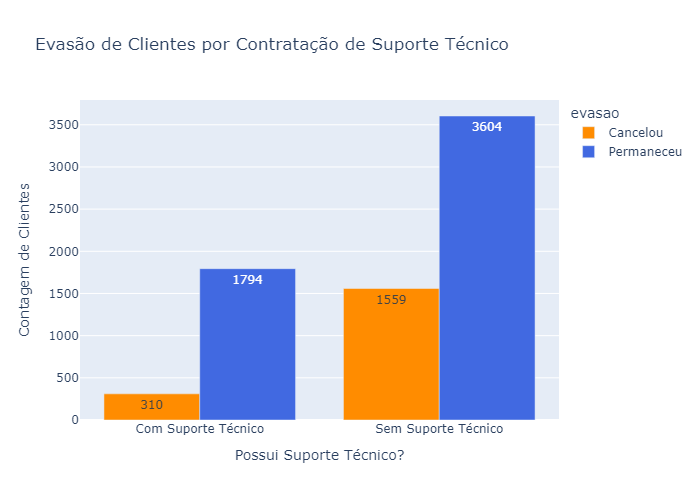

In [26]:
display(Image('imagens/grafico_evasao_por_internet.png'))
display(Image('imagens/grafico_evasao_por_suporte.png'))

### **3.3. Evasão por Variáveis Numéricas**

* **Meses de Contrato**: O gráfico abaixo ilustra que os clientes que cancelam são, predominantemente, **clientes novos**. A mediana de permanência deles é muito baixa, enquanto clientes fiéis possuem um tempo de contrato consideravelmente maior.

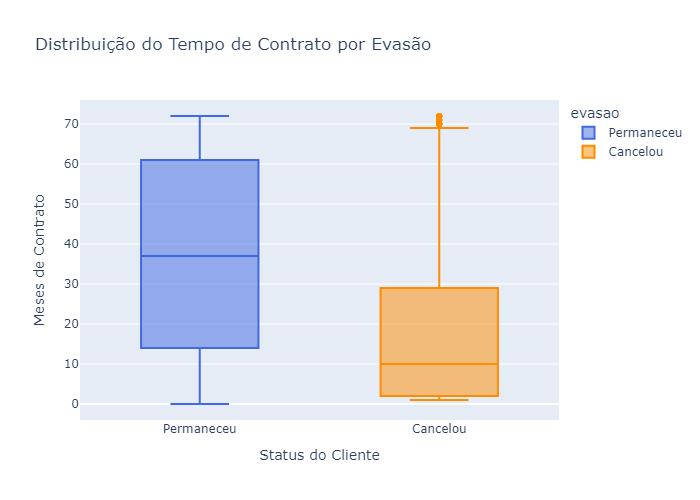

In [27]:
display(Image('imagens/grafico_evasao_por_meses.png'))

---

## **4. Conclusões e Perfil de Risco**

Com base na análise, o perfil do cliente com **maior risco de evasão** é:

> Um cliente com **contrato mensal**, que paga via **cheque eletrônico**, possui o serviço de **Fibra Ótica**, está há **poucos meses** na empresa e **não possui serviços de suporte** contratados.

---

## **5. Recomendações Estratégicas**

1.  **Revisar a Estratégia de Contratos**: Criar campanhas agressivas para migrar clientes do plano mensal para contratos de 1 ou 2 anos, oferecendo descontos ou benefícios claros.
2.  **Investigar o Serviço de Fibra Ótica**: A alta evasão neste segmento precisa ser investigada. A empresa deve analisar se o problema está no preço, na qualidade/estabilidade do serviço ou na concorrência.
3.  **Incentivar Pagamentos Automáticos**: Incentivar ativamente a migração para métodos de pagamento automáticos, que estão associados a clientes mais fiéis, oferecendo descontos ou outras vantagens.
4.  **Criar Ofertas de Serviços Agregados**: Oferecer "pacotes de fidelidade" ou descontos na contratação de serviços como `suporte_tecnico` e `seguranca_online` para clientes de alto risco (novos clientes com contrato mensal).
5.  **Foco nos Primeiros Meses**: Criar um programa de *onboarding* e acompanhamento para os primeiros 3 a 6 meses de vida do cliente, garantindo uma boa experiência inicial e fortalecendo o relacionamento.